<a href="https://colab.research.google.com/github/swsmith25/Sample_TA/blob/main/Sample_Technical_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MINI TA
##Overview
Sample Technical Analyst is a simple project for predicting prices of set stock prices through analysis. This is originally for me to practice investment mathmatics and metrics.
\
(Plans for a larger project will ensue.)

###Companies
The stocks I will watch are:
- Nvidia
- Amazon
- Duke Energies
- /tbd/ mystery stock

For baseline comparisons, I will also run the S&P500 thrgouh the prediction to compare whether select investments will yield higher returns that a lump investment in a S&P fund.

###Dependencies
Libraries used in theis project:

- Pandas
- Numpy
- yFinance
- Seaborn
- Matplot (pyplot)




In [206]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix
from datetime import date, timedelta

In [191]:
# timeframe
# TODO: config file !!!!
start_time = "2021-01-01"
today = date.today() - timedelta(days=1)
end_time = today.strftime("%Y-%m-%d")

# stocks
# NVida
nvda = pd.DataFrame(yf.download("NVDA", start=start_time, end=end_time))
# Amazon
amzn = pd.DataFrame(yf.download("AMZN", start=start_time, end=end_time))
# Duke
duk =  pd.DataFrame(yf.download("DUK", start=start_time, end=end_time))
# Tesla
tsla =  pd.DataFrame(yf.download("TSLA", start=start_time, end=end_time))

# S&P500
sp500 =  pd.DataFrame(yf.download("^GSPC", start=start_time, end=end_time))

# display S&P
sp500.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2021-01-04,3700.649902,3700.649902,3769.989990,3662.709961,3764.610107,5015000000
2021-01-05,3726.860107,3726.860107,3737.830078,3695.070068,3698.020020,4591020000
2021-01-06,3748.139893,3748.139893,3783.040039,3705.340088,3712.199951,6064110000
2021-01-07,3803.790039,3803.790039,3811.550049,3764.709961,3764.709961,5099160000
2021-01-08,3824.679932,3824.679932,3826.689941,3783.600098,3815.050049,4773040000


In [192]:
# Data Exploration

def df_info(dataFrame) :
  stock_info = pd.DataFrame({
      'Datatype': dataFrame.dtypes,
      'Null_count': dataFrame.isnull().sum(),
      'Null_percent': dataFrame.isnull().sum()/len(dataFrame) * 100
    })
  dataFrame.columns = dataFrame.columns.get_level_values(0)
  dataFrame.convert_dtypes()

  # return stock_info

df_info(nvda)
df_info(amzn)
df_info(duk)
df_info(tsla)
df_info(sp500)

tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,243.256668,243.256668,248.163330,239.063339,239.820007,145914600
2021-01-05,245.036667,245.036667,246.946671,239.733337,241.220001,96735600
2021-01-06,251.993332,251.993332,258.000000,249.699997,252.830002,134100000
2021-01-07,272.013336,272.013336,272.329987,258.399994,259.209991,154496700
2021-01-08,293.339996,293.339996,294.829987,279.463318,285.333344,225166500


### Output
| Price     | Type    | Nulls |%|
| --------- | ------- | - | --- |
| Adj Close |	float64 |	0	| 0.0 |
| Close	    |	float64 |	0	| 0.0 |
| High	    |	float64 |	0	| 0.0 |
| Low	      |	float64 |	0	| 0.0 |
| Open	    |	float64	|	0	| 0.0 |
| Volume	  |	float64	|	0	| 0.0 |

In [193]:
print("NVidia\n", nvda.describe())
print()
print("Amazon\n",amzn.describe())
print()
print("Duke\n",duk.describe())
print()
print("Tesla \n",tsla.describe())

NVidia
 Price    Adj Close        Close         High          Low         Open  \
count  1003.000000  1003.000000  1003.000000  1003.000000  1003.000000   
mean     45.462367    45.486442    46.327806    44.567213    45.491567   
std      39.460435    39.455306    40.184021    38.688907    39.525404   
min      11.215972    11.227000    11.735000    10.813000    10.971000   
25%      17.620809    17.646500    17.934501    17.100751    17.521501   
50%      26.516218    26.531000    27.006001    26.209999    26.565001   
75%      49.548952    49.563000    50.132500    49.062500    49.721001   
max     148.869751   148.880005   152.889999   146.259995   149.350006   

Price        Volume  
count  1.003000e+03  
mean   4.387850e+08  
std    1.742405e+08  
min    1.051570e+08  
25%    3.085700e+08  
50%    4.246630e+08  
75%    5.348090e+08  
max    1.543911e+09  

Amazon
 Price    Adj Close        Close         High          Low         Open  \
count  1003.000000  1003.000000  1003.000000

In [194]:
# Market Cap (lower risk-higher return analysis)
nvda['M_Cap'] = nvda['Adj Close'] * nvda['Volume']


amzn['M_Cap'] = amzn['Adj Close'] * amzn['Volume']
duk['M_Cap'] = duk['Adj Close'] * duk['Volume']
tsla['M_Cap'] = tsla['Adj Close'] * tsla['Volume']

sp500['M_Cap'] = sp500['Adj Close'] * sp500['Volume']
nvda.head()

Price,Adj Close,Close,High,Low,Open,Volume,M_Cap
Date,,,,,,,
2021-01-04,13.080303,13.11350,13.65250,12.9625,13.10425,560640000,7.333341e+09
2021-01-05,13.370818,13.40475,13.44350,13.0870,13.09975,322760000,4.315565e+09
2021-01-06,12.582567,12.61450,13.24500,12.5860,13.22250,580424000,7.303224e+09
2021-01-07,13.310216,13.34400,13.37775,12.8865,12.96750,461480000,6.142398e+09
2021-01-08,13.243138,13.27675,13.42100,13.0420,13.36250,292528000,3.873989e+09


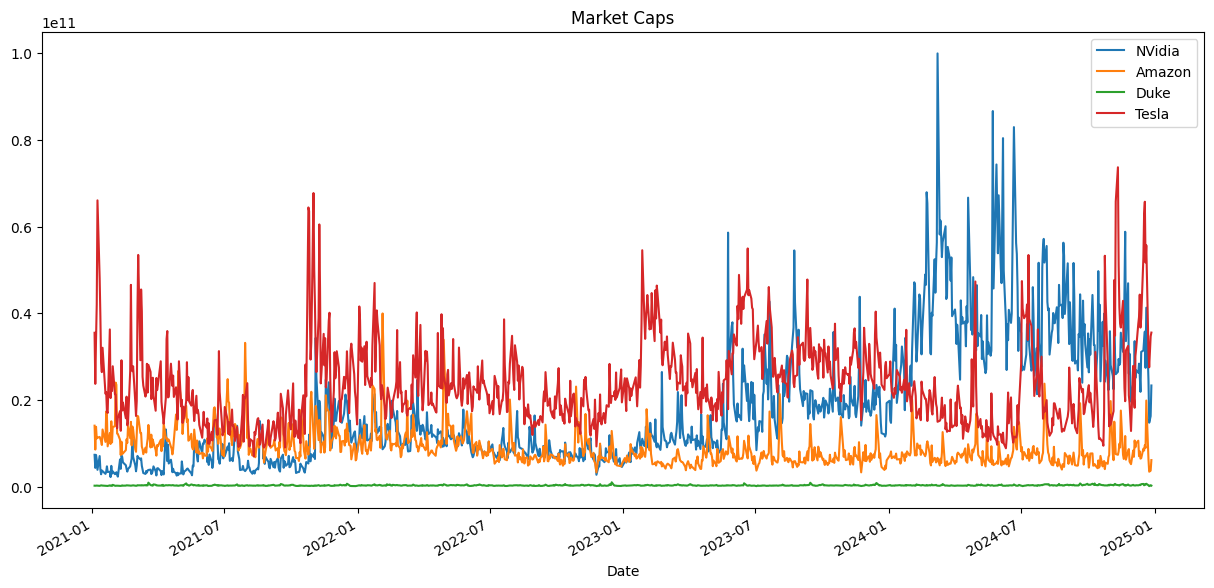

In [195]:
nvda['M_Cap'].plot(label = "NVidia", figsize = (15, 7))
# print(nvda['M_Cap'])
amzn['M_Cap'].plot(label = "Amazon")
duk['M_Cap'].plot(label = "Duke")
tsla['M_Cap'].plot(label = "Tesla")
plt.title('Market Caps')
plt.legend()

Note that Duke market cap is smaller comparitively to the others.
With independant testing, I have made more profit off investing in Duke Energy based on following politician investments. But Nvidia, Amazon, and Tesla are 'safer'

In [196]:
# Moving Average
nvda['MA_50'] = nvda['Open'].rolling(50).mean()
nvda['MA_200'] = nvda['Open'].rolling(200).mean()

amzn['MA_50'] = amzn['Open'].rolling(50).mean()
amzn['MA_200'] = amzn['Open'].rolling(200).mean()

tsla['MA_50'] = tsla['Open'].rolling(50).mean()
tsla['MA_200'] = tsla['Open'].rolling(200).mean()

duk['MA_50'] = duk['Open'].rolling(50).mean()
duk['MA_200'] = duk['Open'].rolling(200).mean()

sp500['MA_50'] = sp500['Open'].rolling(50).mean()
sp500['MA_200'] = sp500['Open'].rolling(200).mean()

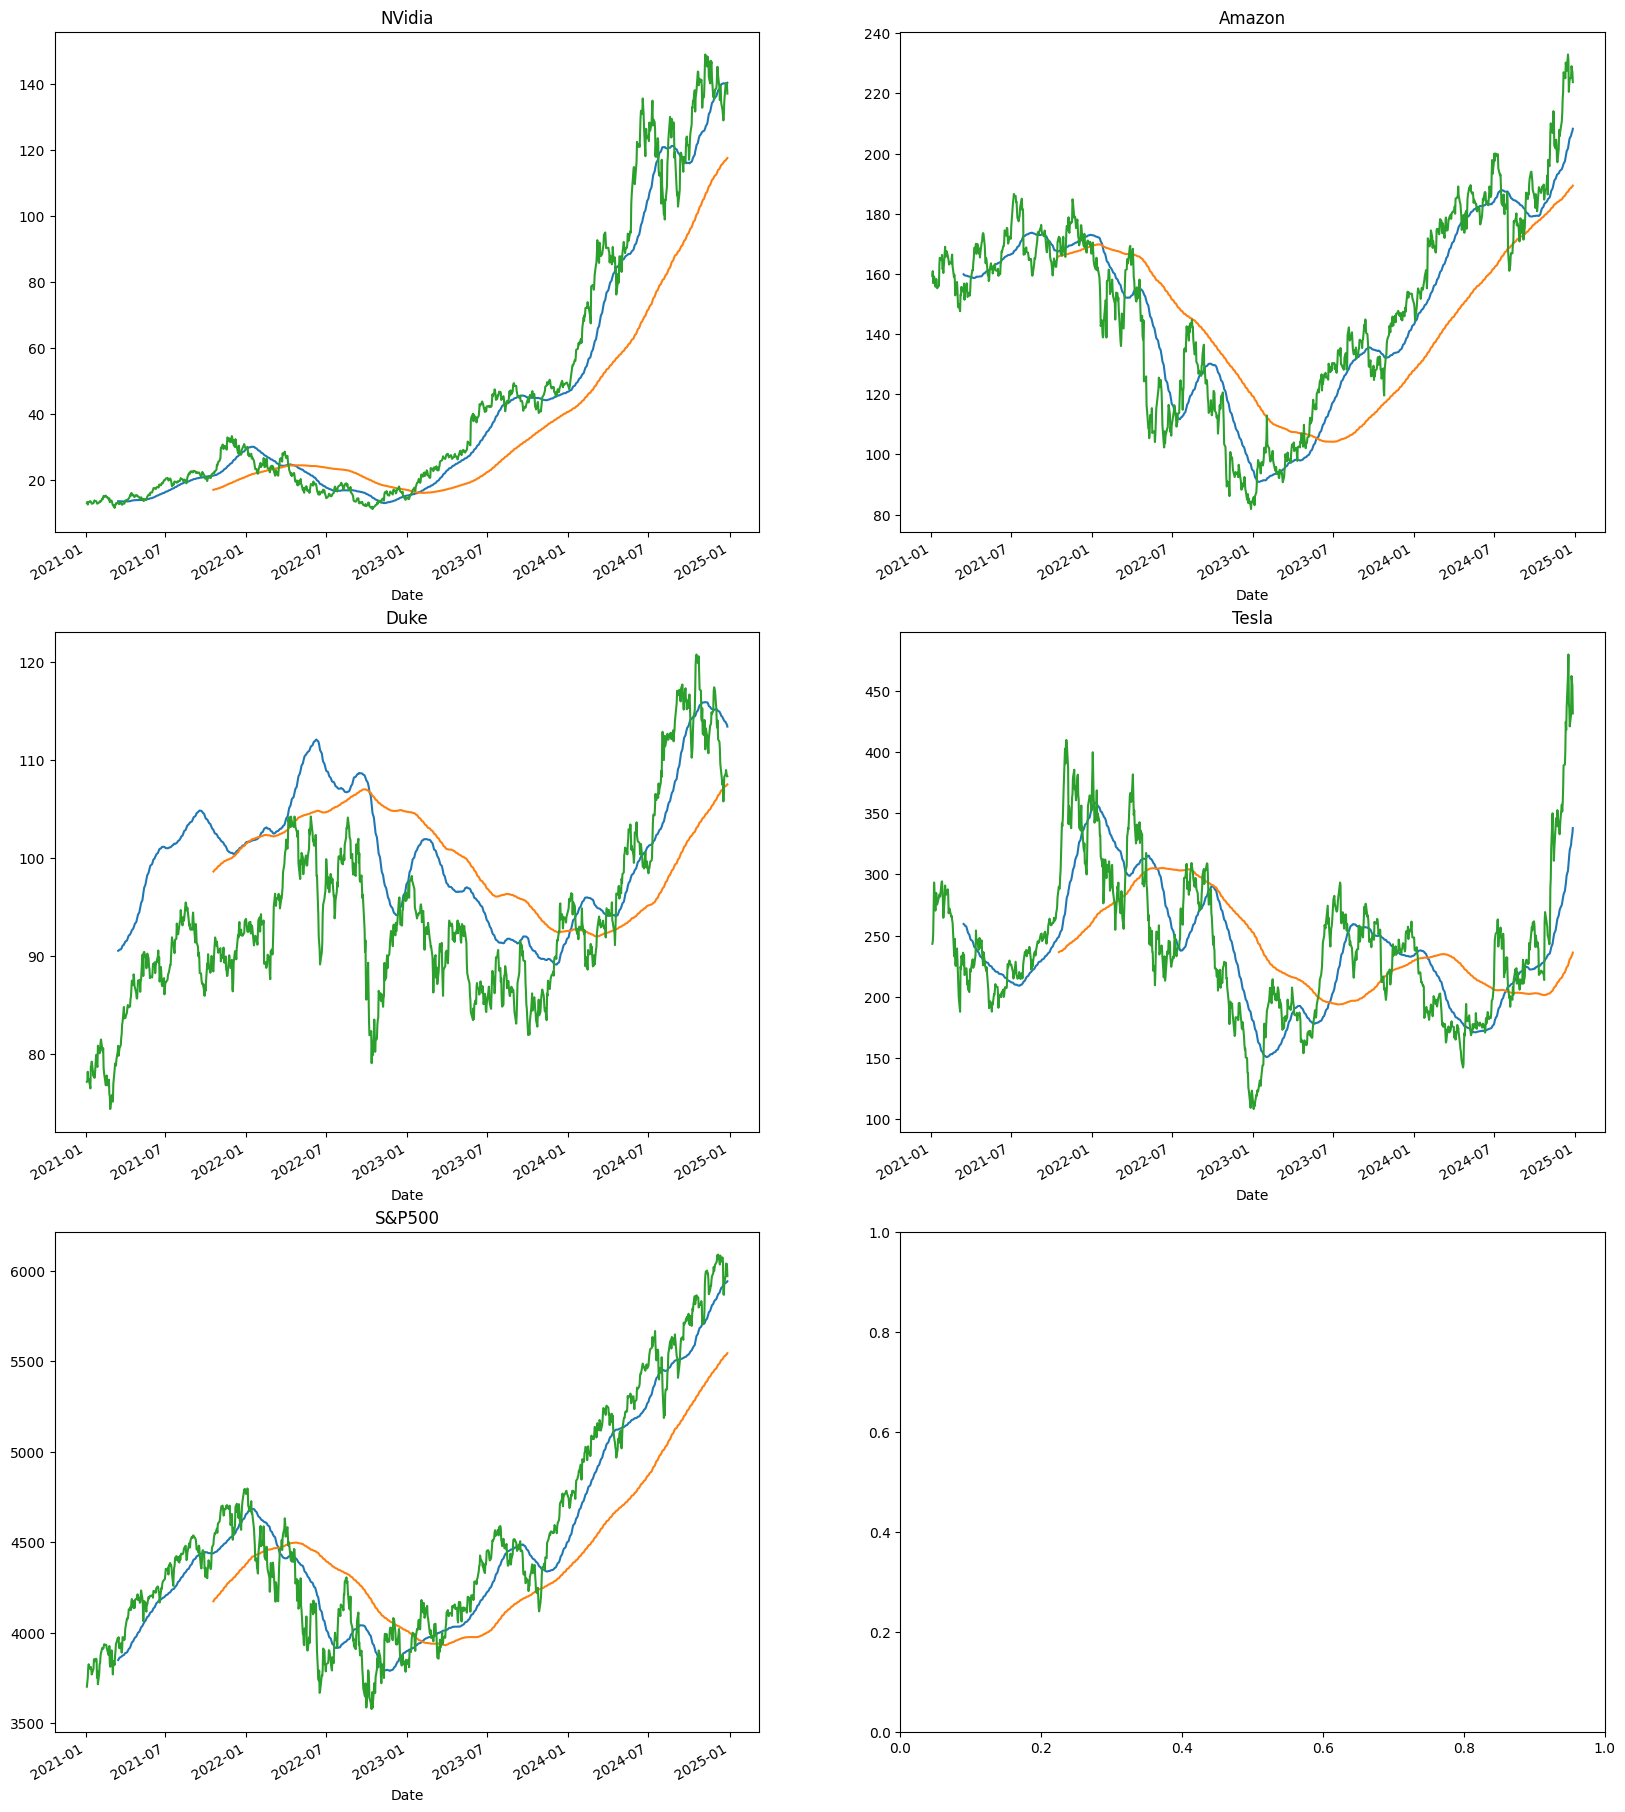

In [197]:
# plot moving avg
figure, axes = plt.subplots(3, 2, figsize = (20, 25))

axes[0,0].set_title('NVidia')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Duke')
axes[1,1].set_title('Tesla')
axes[2,0].set_title('S&P500')

nvda['MA_50'].plot(ax = axes[0,0])
nvda['MA_200'].plot(ax = axes[0,0])
nvda['Adj Close'].plot(ax = axes[0,0])

amzn['MA_50'].plot(ax = axes[0,1])
amzn['MA_200'].plot(ax = axes[0,1])
amzn['Adj Close'].plot(ax = axes[0,1])


tsla['MA_50'].plot(ax = axes[1,1])
tsla['MA_200'].plot(ax = axes[1,1])
tsla['Adj Close'].plot(ax = axes[1,1])

duk['MA_50'].plot(ax = axes[1,0])
duk['MA_200'].plot(ax = axes[1,0])
duk['Adj Close'].plot(ax = axes[1,0])

sp500['MA_50'].plot(ax = axes[2,0])
sp500['MA_200'].plot(ax = axes[2,0])
sp500['Adj Close'].plot(ax = axes[2,0])

plt.show()

In [199]:
# Volatility and Stability
# return = ((price @ T) / (price @ T-1)) - 1
nvda['return'] = (nvda['Adj Close'] / nvda['Adj Close'].shift(1)) - 1
amzn['return'] = (amzn['Adj Close'] / amzn['Adj Close'].shift(1)) - 1
tsla['return'] = (tsla['Adj Close'] / tsla['Adj Close'].shift(1)) - 1
duk['return'] = (duk['Adj Close'] / duk['Adj Close'].shift(1)) - 1

sp500['return'] = (sp500['Adj Close']/sp500['Adj Close'].shift(1)) - 1

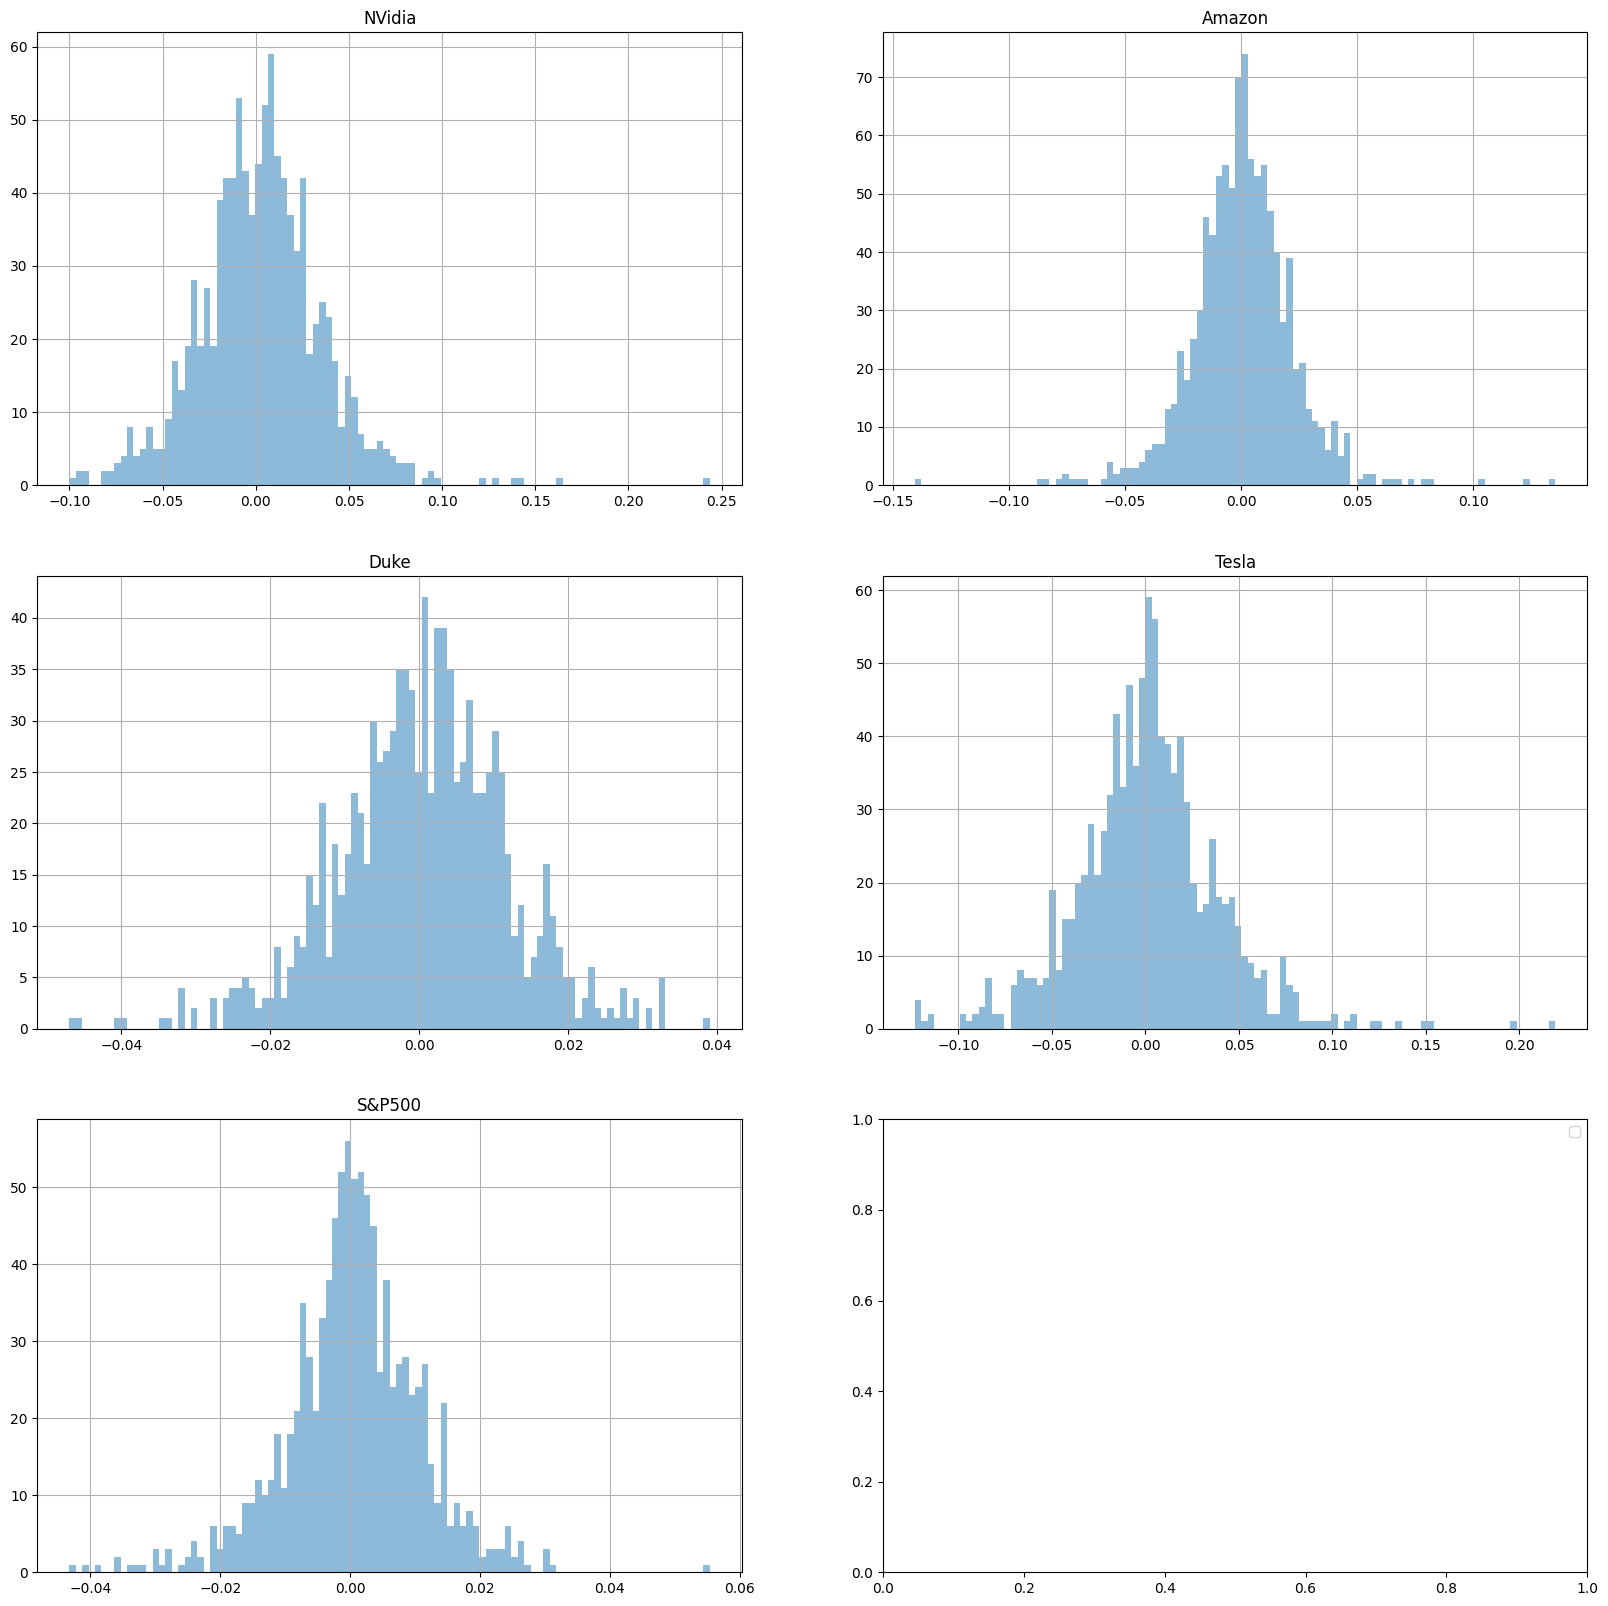

In [205]:
# Plot Vol and Stability
# plot moving avg
figure, axes = plt.subplots(3, 2, figsize = (20, 20))


axes[0,0].set_title('NVidia')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Duke')
axes[1,1].set_title('Tesla')

axes[2,0].set_title('S&P500')

nvda['return'].hist(bins = 100, label = "NVidia", alpha = .5, ax = axes[0,0])
tsla['return'].hist(bins = 100, label = "Tesla", alpha = .5, ax = axes[1,1])
duk['return'].hist(bins = 100, label = "Duke", alpha = .5, ax = axes[1,0])
amzn['return'].hist(bins = 100, label = "Amazon", alpha = .5, ax = axes[0,1])

sp500['return'].hist(bins = 100, label = "S&P500", alpha = .5, ax = axes[2,0])


The wider the histogram, the more volatile the stock.

Text(0.5, 1.0, 'Nvidia')

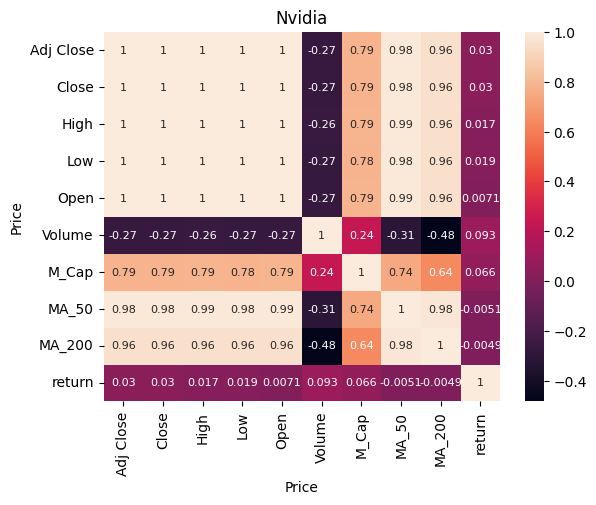

In [223]:
# Correlation
nvda_corr = nvda.corr()
# heatmap
sns.heatmap(nvda_corr, annot = True, annot_kws={"size": 8}).set_title('Nvidia')

Text(0.5, 1.0, 'Amazon')

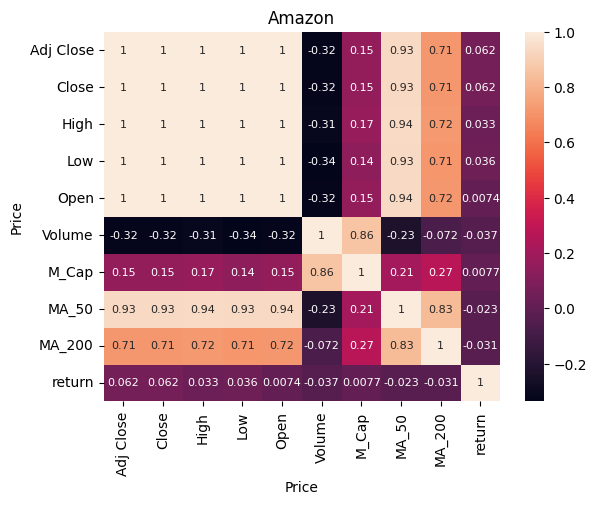

In [224]:
amzn_corr = amzn.corr()
sns.heatmap(amzn_corr, annot = True, annot_kws={"size": 8}).set_title('Amazon')

Text(0.5, 1.0, 'Duke')

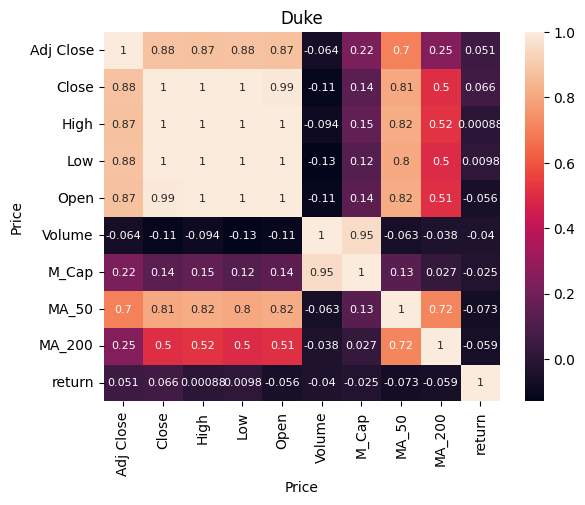

In [225]:
duk_corr = duk.corr()
sns.heatmap(duk_corr, annot = True, annot_kws={"size": 8}).set_title('Duke')

Text(0.5, 1.0, 'Tesla')

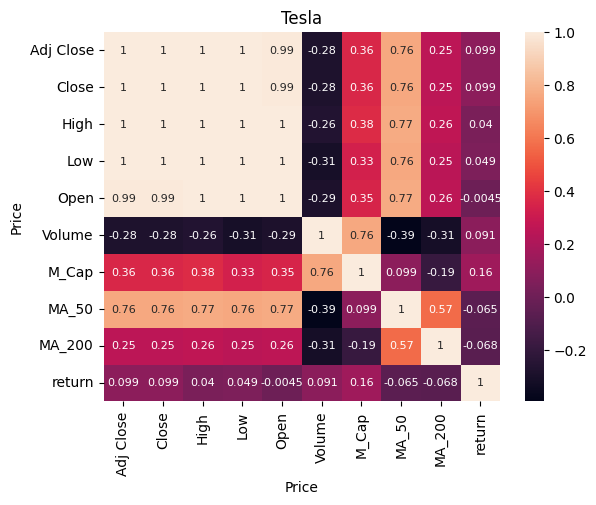

In [226]:
tsla_corr = tsla.corr()
sns.heatmap(tsla_corr, annot = True, annot_kws={"size": 8}).set_title('Tesla')

Text(0.5, 1.0, 'S&P500')

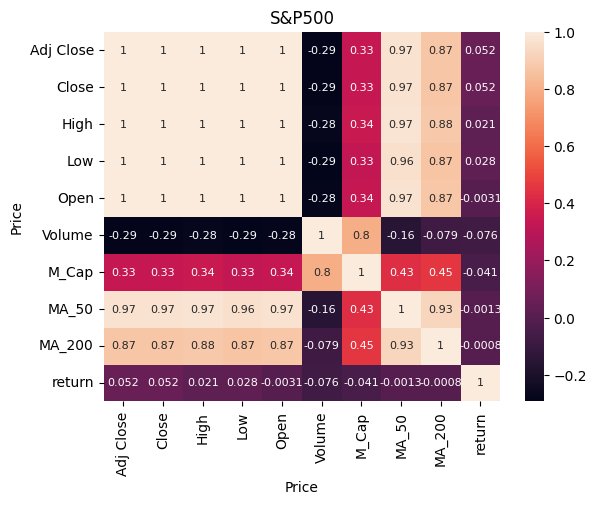

In [227]:
sp500_corr = sp500.corr()
sns.heatmap(sp500_corr, annot = True, annot_kws={"size": 8}).set_title('S&P500')

Volume negatively correlated with open/close/